# K-Means Animation
#### Rohith Ramakrishnan - CB.EN.U4AIE19052
<hr style="border:1px solid gray"> </hr>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
import pylab as pl
import time as t

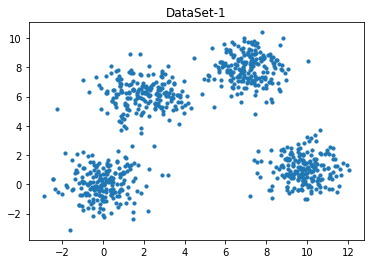

In [16]:
#Random Data -1
cen_1 = np.array([0,0])
cen_2 = np.array([7,8])
cen_3 = np.array([10,1])
cen_4 = np.array([2,6])
#The final Convergence of the KMeans Algorithms should have Centroids close to these values.

# Generate random data and center it to the three centers
data_1 = np.random.randn(200,2) + cen_1
data_2 = np.random.randn(200,2) + cen_2
data_3 = np.random.randn(200,2) + cen_3
data_4 = np.random.randn(200,2) + cen_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=10)
plt.title("DataSet-1")
plt.show()

In [17]:
X=data

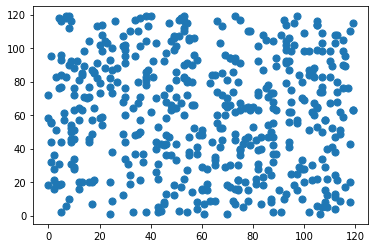

In [9]:
#Random Data-2
X = np.array(np.random.randint(120,size=(500,2)))
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [14]:
k=4
maxit=100
class kmeans:
    
    def __init__(self, X, k , maxit):
        self.k = k
        self.X = X
        self.maxit = maxit
        
 

    def animate(self):
        
        def distance(x, y):
            s=0
            for i in range(0,len(x)):
                s += (x[i] - y[i])**2
            return math.sqrt(s)
        
        #Using the random to select random points in the Data array 
        cent=random.sample(list(X),k)
        #Printing the randomly chosen points:
        print("Centers Initial:")
        for a in cent:
            print(a)
        print("")
        s=0
        loss=0
        lp=[]
        for s in range(maxit):
            c1 = cent.copy()
            ll=0
            s+=1
            D = np.zeros((k,len(X)))
            for i in range(0,k):
                for a in range(0,len(X)):
                    D[i][a] = distance(cent[i],X[a])
            L = np.argmin(D,axis=0)

            for v in range(0,k):
                i = [index for index, element in enumerate(L) if element == v]
                cent[v]=X[i].mean(axis=0) 

            S=[[] for a in range(k)]
            for v in range(len(L)):
                S[L[v]].append(X[v].tolist())
                for i in range(k):
                    for r in S[L[v]]:
                        loss+=distance(cent[i],r)**2
                        ll+=distance(cent[i],r)
            lp.append(ll)
            S = np.array(S)
            for i in range(0,k):
                o=np.array(S[i])
                l="Classification-"+str(i+1)
                plt.scatter(o[:,0], o[:,1], s=50,label=l)
            c = np.array(cent)
            plt.scatter(c[:,0], c[:,1],marker="^", s=100,label="Centeroids")
            plt.legend()
            display.clear_output(wait=True)
            plt.show()
            display.display(pl.gcf())#hold the plots on same figure
            c1=np.array(c1)
            if(np.linalg.norm(c1-cent)<0.0001):
                        print("Iterations Taken to Converge :",s,'\n')
                        break

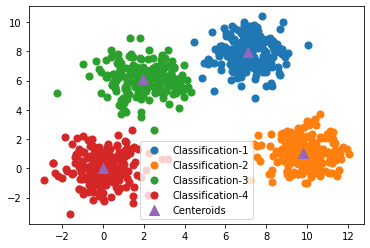

<Figure size 432x288 with 0 Axes>

Iterations Taken to Converge : 12 



<Figure size 432x288 with 0 Axes>

In [18]:
a = kmeans(X, 4, 300).animate()

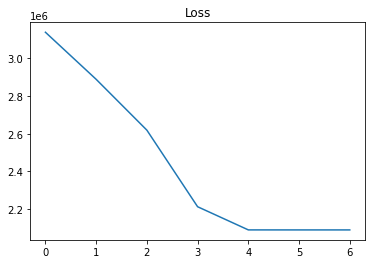

In [11]:
plt.plot(lp)
plt.title("Loss")
plt.show()